[Taken From Here](http://avinashu.com/tutorial/pythontutorialnew/NetworkXBasics.html)

# Introduction to NetworkX

The focus of this tutorial is to provide a basic introduction to using NetworkX. NetworkX is a python package which can be used for network analysis. NetworkX package contains several standard network algorithms which we will use in our course. This tutorial is by no means exhaustive. For more information, refer to the NetworkX documentation [here](http://networkx.readthedocs.io/en/latest/index.html).

## Initializing the Network

The first step is to import the networkx module.

In [1]:
import networkx as nx

Next we initialize an empty Graph object. 

In [2]:
# The following line initializes two empty directed graph objects
G1=nx.DiGraph()
G2=nx.DiGraph()
# An empty undirected graph object can be initialized using the command
# G=nx.Graph()

Let us look at the network presented in Ahuja, Magnanti, and Orlin (1993) classic book on Network Flows. We can enter the nodes in multiple ways.

In [32]:
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_node(4)
G1.add_node(5)
G1.add_node(6)
G1.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [33]:
list_nodes = [1, 2, 3, 4, 5, 6]
G2.add_nodes_from(list_nodes)
G2.nodes()

NodeView((1, 2, 3, 4, 5, 6))

Let us now add the arcs. As with nodes, there are multiple ways to add the arcs.

In [34]:
G1.add_edge(1, 2, weight = 2.0)
G1.add_edge(1,3)
G1[1][3]['weight'] = 4.0
G1.add_edge(2, 3, weight = 1.0)
G1.add_edge(2, 4, weight = 4.0)
G1.add_edge(2, 5, weight = 2.0)
G1.add_edge(3, 5)
G1[3][5]['weight'] = 3.0
G1.add_edge(4, 6, weight = 2.0)
G1.add_edge(5, 4, weight = 3.0)
G1.add_edge(5, 6, weight = 2.0)
G1.edges()

OutEdgeView([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 6), (5, 4), (5, 6)])

In [35]:
G1[4][6]

{'weight': 2.0}

In [36]:
list_arcs = [(1,2,2.0) , (1,3,4.0) , (2,3,1.0) , (2,4,4.0) , (2,5,2.0) , (3,5,3.0) , (4,6,2.0) , (5,4,3.0) , (5,6,2.0)]
G2.add_weighted_edges_from(list_arcs)
G2.edges()

OutEdgeView([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 6), (5, 4), (5, 6)])

## Shortest Path

Let us now determine the shortest path using Djikstras algorithm. The function shown below returns a list which stores the shortest path from source to target.

In [37]:
sp = nx.dijkstra_path(G1,source = 1, target = 6)
print(sp)

[1, 2, 5, 6]


 Note that there are several other routines to determine the shortest path.

In [38]:
print(nx.shortest_path(G1,source = 1, target = 6))

[1, 2, 4, 6]


Let us now visualize the network along with the shortest path. Note that in networkx and matplotlib, the arrows in the directed arcs are represented as notches and not arrows which is annoying. 

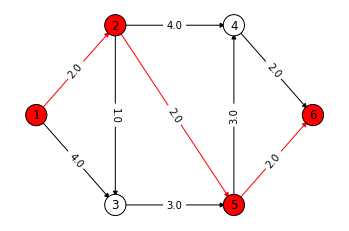

In [39]:
# First we import the matplotlib python plotting package
import matplotlib.pyplot as plt
# We then set the coordinates of each node
G1.node[1]['pos'] = (0,0)
G1.node[2]['pos'] = (2,2)
G1.node[3]['pos'] = (2,-2)
G1.node[4]['pos'] = (5,2)
G1.node[5]['pos'] = (5,-2)
G1.node[6]['pos'] = (7,0)
# The positions of each node are stored in a dictionary
node_pos=nx.get_node_attributes(G1,'pos')
# The edge weights of each arcs are stored in a dictionary
arc_weight=nx.get_edge_attributes(G1,'weight')
# Create a list of arcs in the shortest path using the zip command and store it in red edges
red_edges = list(zip(sp,sp[1:]))
# If the node is in the shortest path, set it to red, else set it to white color
node_col = ['white' if not node in sp else 'red' for node in G1.nodes()]
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G1.edges()]
# Draw the nodes
# nx.draw_networkx(G1, node_pos,node_color= node_col, node_size=450)
nodes = nx.draw_networkx_nodes(G1, node_pos,node_color= node_col, node_size=450)
nodes.set_edgecolor('k')
# Draw the node labels
nx.draw_networkx_labels(G1, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G1, node_pos,edge_color= edge_col)
# Draw the edge labels
nx.draw_networkx_edge_labels(G1, node_pos,edge_color= edge_col, edge_labels=arc_weight)
# Remove the axis
plt.axis('off')
# Show the plot
plt.show()

Dont forget to clear the graph object.

In [15]:
G1.clear()
G2.clear()

In [16]:
G1.edges()

OutEdgeView([])

Let us now visualize the Sioux Falls Network Available [here](https://github.com/bstabler/TransportationNetworks/tree/master/SiouxFalls). For the sake of simplicity, I am going to assume that the cost on each arc is going to be the integer rounded costs provided in SiouxFalls_flow.tntp and the node coordinates are provided in SiouxFalls_node.tntp. Make sure both files are in a directory called SiouxFalls in the same location where you have this notebook file.

In [25]:
G3=nx.DiGraph()
f = open("SiouxFalls/SiouxFalls_flow.tntp", "r")
line = f.readline()
line = f.readline()
while len(line):
    l = line.split()
    fromnode = int(l[0])
    to = int(l[1])
    volume = float(l[2])
    cost = int(float(l[3]))
    G3.add_edge(fromnode, to, weight = cost)
    line = f.readline()
f.close()
print(G3.number_of_edges())

f = open("SiouxFalls/SiouxFalls_node.tntp", "r")
line = f.readline()
line = f.readline()
while len(line):
    line = line.strip(';')
    l = line.split()
    node = int(l[0])
    pos1 = float(l[1])/10000
    pos2 = float(l[2])/10000
    G3.add_node(node, pos=(pos1,pos2))
    line = f.readline()
f.close()
print(G3.number_of_nodes())



76
24


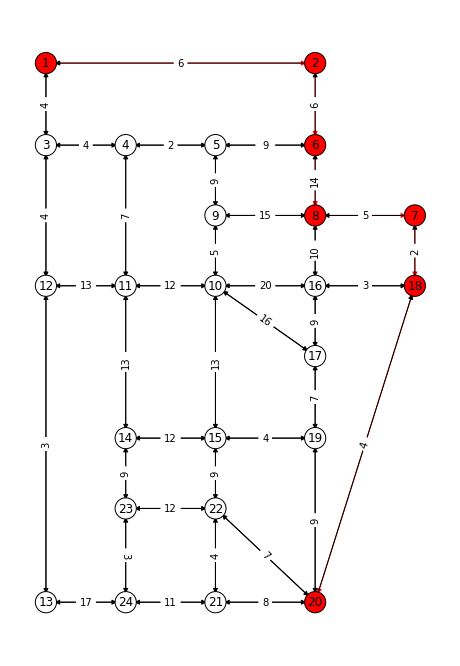

In [31]:
plt.figure(figsize=(8,12))
# The positions of each node are stored in a dictionary
node_pos=nx.get_node_attributes(G3,'pos')
# The edge weights of each arcs are stored in a dictionary
arc_weight=nx.get_edge_attributes(G3,'weight')
# Determine the shortest path
sp = nx.dijkstra_path(G3,source = 1, target = 20)
# Create a list of arcs in the shortest path using the zip command and store it in red edges
red_edges = list(zip(sp,sp[1:]))
# If the node is in the shortest path, set it to red, else set it to white color
node_col = ['white' if not node in sp else 'red' for node in G3.nodes()]
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G3.edges()]
# Draw the nodes
#nx.draw_networkx(G3, node_pos,node_color= node_col, node_size=450)
nodes = nx.draw_networkx_nodes(G3, node_pos,node_color= node_col, node_size=450)
nodes.set_edgecolor('k')
# Draw the node labels
nx.draw_networkx_labels(G3, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G3, node_pos,edge_color= edge_col)
# Draw the edge labels
nx.draw_networkx_edge_labels(G3, node_pos,edge_color= edge_col, edge_labels=arc_weight)
# Remove the axis
plt.axis('off')
# Show the plot
plt.show()


In [21]:
G3.clear()

There are three main issues with the above visualization:

* Using of notches instead of arrows
* When you have a two arcs connecting two nodes in opposite directions, the arcs are overlayed
* The costs of arcs in both directions are written one over the other which is annoying

So for better network visualization especially for directed networks, I recommend looking at the GraphViz or pygraphviz package

## Minimum Spanning Tree

Let us use the NetworkX package to determine the Minimum Spanning Tree.

In [44]:
G4 = nx.Graph()
list_edges = [(1,2,2.0) , (1,4,4.0) , (2,3,3.0) , (2,5,2.0) , (3,6,1.0) , (4,5,2.0) , (4,7,6.0) , (5,6,5.0) , (5,8,3.0) , (6,9,8.0) , (8,9,1.0) , (7,8,2.0)]
G4.add_weighted_edges_from(list_edges)
G4.node[1]['pos'] = (0,0)
G4.node[2]['pos'] = (0,2)
G4.node[3]['pos'] = (0,4)
G4.node[4]['pos'] = (2,0)
G4.node[5]['pos'] = (2,2)
G4.node[6]['pos'] = (2,4)
G4.node[7]['pos'] = (4,0)
G4.node[8]['pos'] = (4,2)
G4.node[9]['pos'] = (4,4)
T = nx.minimum_spanning_tree(G4)
print(T.edges())


[(1, 2), (2, 5), (2, 3), (4, 5), (3, 6), (5, 8), (7, 8), (8, 9)]


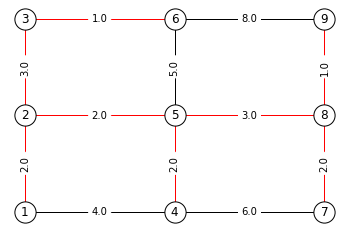

In [45]:
node_pos=nx.get_node_attributes(G4,'pos')
edge_weight=nx.get_edge_attributes(G4,'weight')
red_edges = T.edges()
node_col = ['white']
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G4.edges()]
# Draw the nodes
nodes = nx.draw_networkx_nodes(G4, node_pos,node_color= node_col, node_size=450)
nodes.set_edgecolor('k')
# Draw the node labels
nx.draw_networkx_labels(G4, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G4, node_pos,edge_color= edge_col)
# Draw the edge labels
nx.draw_networkx_edge_labels(G4, node_pos,edge_color= edge_col, edge_labels=edge_weight)
# Remove the axis
plt.axis('off')
# Show the plot
plt.show()
G4.clear()

## Minimum Cost Flow

We will use NetworkX package to solve the minimum cost flow problem example provided in page 322 of Ahuja, Magnanti, and Orlin (1993).

In [47]:
G5 = nx.DiGraph()
G5.add_edge(1,2, weight=2, capacity=4)
G5.add_edge(1,3, weight=2, capacity=2)
G5.add_edge(2,3, weight=1, capacity=2)
G5.add_edge(2,4, weight=3, capacity=3)
G5.add_edge(3,4, weight=1, capacity=5)
G5.node[1]['demand'] = -4
G5.node[4]['demand'] = 4
cost, flow = nx.capacity_scaling(G5)
print("The minimum cost is:", cost)
print("The optimal flow is:")
print(flow)
# The data structure of flow is not consistent with dictionary datastructure
# needed for printing the optimal solution
optimal_flow = {}
for i in G5.nodes:
    for j in flow[i].keys():
        optimal_flow[i,j] = flow[i][j]
    

The minimum cost is: 14
The optimal flow is:
{1: {2: 2, 3: 2}, 2: {3: 2, 4: 0}, 3: {4: 4}, 4: {}}


In [48]:
G5.node[1]['pos'] = (0,0)
G5.node[2]['pos'] = (3,3)
G5.node[3]['pos'] = (3,-3)
G5.node[4]['pos'] = (6,0)
node_pos = nx.get_node_attributes(G5,'pos')
arc_cost = nx.get_edge_attributes(G5,'weight')
arc_cap  = nx.get_edge_attributes(G5,'capacity')

The edge weights correspond to optimal flow values:


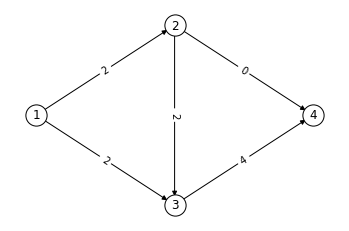

In [55]:
nodes = nx.draw_networkx_nodes(G5, node_pos,node_color='white' , node_size=450)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G5, node_pos,node_color='white')
nx.draw_networkx_edges(G5, node_pos)
nx.draw_networkx_edge_labels(G5, node_pos,edge_labels=optimal_flow)
# Remove the axis
plt.axis('off')
# Show the plot
print("The edge weights correspond to optimal flow values:")
plt.show()


The [algorithms](https://networkx.readthedocs.io/en/stable/reference/algorithms.html) section of the NetworkX reference document contains details on various other network algorithms which can be solved using the NetworkX package.